# Western Governors University
## D213 - Advanced Data Analytics - Sentiment Analysis
### Shane Boyce


## Part I:  Research Question

### A.  Describe the purpose of this data analysis by doing the following:

1.  Summarize one research question that you will answer using neural network models and NLP techniques. Be sure the research question is relevant to a real-world organizational situation and sentiment analysis captured in your chosen dataset.

Using a subset of the IMDB dataset provided from UCI, can the sentiment of reviews be predicted using a neural network model?

2.  Define the objectives or goals of the data analysis. Be sure the objectives or goals are reasonable within the scope of the research question and are represented in the available data.

The goal of this project is to build a NLP and deep learning network to perform sentiment analysis on IMDB movie reviews.

3.  Identify a type of neural network capable of performing a text classification task that can be trained to produce useful predictions on text sequences on the selected data set.



In [118]:
# import libraries for sentiment analysis
import numpy as np
# set random state
np.random.seed(42069)
import pandas as pd
import matplotlib.pyplot as plt

#magic word settings
%matplotlib inline


In [119]:
# read in imdb data
uci_imdb = pd.read_csv('imdb_labelled.txt', sep='  	', engine='python', header=None)
uci_imdb.columns = ['Review', 'Sentiment']
uci_imdb.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [120]:
uci_imdb.shape

(1000, 2)

In [121]:
#check for duplicates
uci_imdb.duplicated().sum()


3

In [122]:
#drop all duplicates
uci_imdb = uci_imdb.drop_duplicates()
uci_imdb.shape

(997, 2)

In [123]:
#check for nulls
uci_imdb.isnull().sum()

Review       0
Sentiment    0
dtype: int64

<AxesSubplot:>

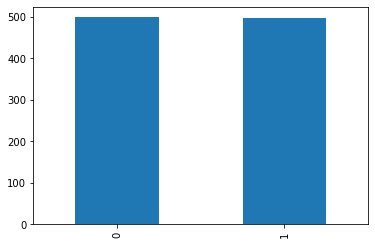

In [124]:
#bar plot of sentiment
uci_imdb.Sentiment.value_counts().plot(kind='bar')

In [125]:
#summary statistics
uci_imdb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sentiment,997.0,0.499498,0.500251,0.0,0.0,0.0,1.0,1.0


In [126]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smcgb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [127]:
#print stopwords
stop_words = (nltk.corpus.stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [128]:
#create list of movie specific stopwords
movie_stopwords = ['movie', 'film', 'films', 'movies']

In [129]:
# add movie specific stopwords
for word in movie_stopwords:
    if word not in stop_words:
        stop_words.append(word)
    else:
        pass

In [130]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [131]:
#tensorflow and other nlp libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


tokenizer = Tokenizer(oov_token="<OOV>") #oov_token is for out of vocabulary words, "This is a better option instead of throwing out unknown words." (Sucky, 2021)


## Part II:  Data Preparation

### B.  Summarize the data cleaning process by doing the following:

1.  Perform exploratory data analysis on the chosen dataset, and include an explanation of each of the following elements:

•   presence of unusual characters (e.g., emojis, non-English characters, etc.)

In [132]:
#stepwise tokenization
#set string to lower case
uci_imdb['reduced'] = uci_imdb['Review'].str.lower()


In [133]:
#remove special characters
uci_imdb['reduced'] = uci_imdb['reduced'].str.replace('[^\w\s]',' ')
#remove numbers
uci_imdb['reduced'] = uci_imdb['reduced'].str.replace('\d+', ' ')
#remove stopwords from reduced column
uci_imdb['reduced'] = uci_imdb['reduced'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#remove stopwords
uci_imdb['tokenized'] = uci_imdb['reduced'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#reorder columns so sentiment is last
uci_imdb = uci_imdb[['Review', 'reduced', 'tokenized', 'Sentiment']]


C:\Users\smcgb\AppData\Local\Temp\ipykernel_33604\1942109640.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  uci_imdb['reduced'] = uci_imdb['reduced'].str.replace('[^\w\s]',' ')
C:\Users\smcgb\AppData\Local\Temp\ipykernel_33604\1942109640.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  uci_imdb['reduced'] = uci_imdb['reduced'].str.replace('\d+', ' ')


In [134]:
#convert reviews to word lists using split
uci_imdb['tokenized'] = uci_imdb['tokenized'].apply(lambda x: x.split())

In [135]:
#word count for each review
uci_imdb['word_count'] = uci_imdb['tokenized'].apply(lambda x: len(x))

In [136]:
#reorder columns so sentiment is last
uci_imdb = uci_imdb[['Review', 'reduced', 'tokenized','word_count', 'Sentiment']]

In [137]:
uci_imdb.sample(5)

,Review,reduced,tokenized,word_count,Sentiment
335,It was a very superficial movie and it gave me...,superficial gave feeling watching play rather,"[superficial, gave, feeling, watching, play, r...",6,0
716,"The lines, the cuts, the audio, everything is ...",lines cuts audio everything wrong,"[lines, cuts, audio, everything, wrong]",5,0
402,"It was very popular when I was in the cinema, ...",popular cinema good house good reactions plent...,"[popular, cinema, good, house, good, reactions...",8,1
419,"Only like 3 or 4 buildings used, a couple of l...",like buildings used couple locations maybe poo...,"[like, buildings, used, couple, locations, may...",8,0
762,The movie was very interesting from beginning ...,interesting beginning end,"[interesting, beginning, end]",3,1


In [138]:
#get number of unique words in the dataset
unique_words = set()
for review in uci_imdb['tokenized']:
    for word in review:
        unique_words.add(word)        

In [139]:
#number of unique words
len(unique_words)

2890

<AxesSubplot:ylabel='Frequency'>

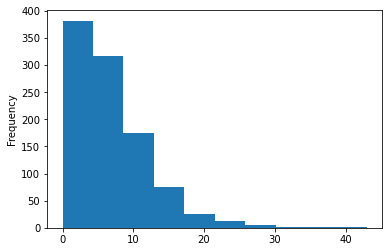

In [140]:
#visualize word count distribution
uci_imdb['word_count'].plot(kind='hist')

In [141]:
#tfidf vectorizer on tokenized reviews
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvector = TfidfVectorizer()
X_tfid = tfidfvector.fit_transform(uci_imdb['tokenized'].apply(lambda x: ' '.join(x)))

In [142]:
X_tfid.shape

(997, 2878)

In [143]:
print(len(tfidfvector.get_feature_names_out()))

2878


In [144]:
#convert tfidf to dataframe
X_tfid_df = pd.DataFrame(X_tfid.toarray(), columns=tfidfvector.get_feature_names_out())
X_tfid_df.head()

,aailiyah,abandoned,ability,abroad,absolutely,abstruse,abysmal,academy,accents,accessible,...,yes,yet,young,younger,youthful,youtube,yun,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.363884,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

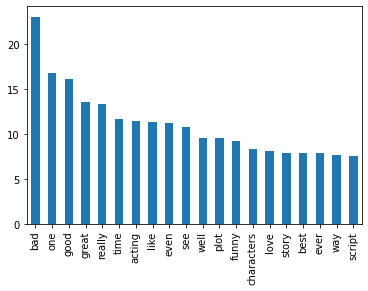

In [145]:
#visualize tfidf
X_tfid_df.sum().sort_values(ascending=False).head(20).plot(kind='bar')

In [146]:
#to csv
X_tfid_df.to_csv('clean.csv')

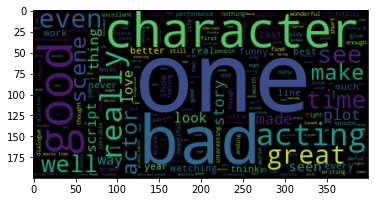

In [147]:
#word cloud 
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(uci_imdb['tokenized'].apply(lambda x: ' '.join(x))))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

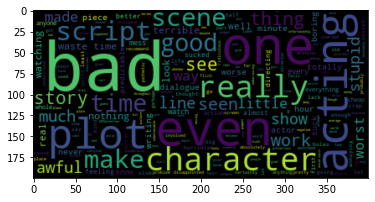

In [148]:
#wordcloud for sentiment 0 / negative sentiment
wordcloud = WordCloud().generate(' '.join(uci_imdb[uci_imdb['Sentiment']==0]['tokenized'].apply(lambda x: ' '.join(x))))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

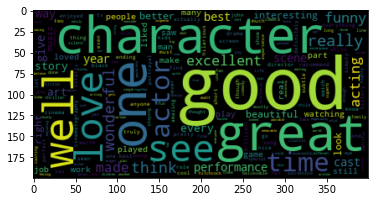

In [149]:
#wordcloud for sentiment 1 / positive sentiment
wordcloud = WordCloud().generate(' '.join(uci_imdb[uci_imdb['Sentiment']==1]['tokenized'].apply(lambda x: ' '.join(x))))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

In [150]:
# split reduced review into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(uci_imdb['reduced'], uci_imdb['Sentiment'], test_size=0.2, random_state=42)
# export train and test data to csv
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [151]:
X_train.head()

745                         despite pans reviewers liked
286                            plot well said let one go
165    nobody identifies characters cardboard cutouts...
961    actors truly understand become particular char...
494    really hope team behind makes continue kinda w...
Name: reduced, dtype: object

•   vocabulary size

The vocab size will be equal to the unique words after stop word removal from the IMDB dataset, this is around 2800 words.

In [152]:
len(tfidfvector.get_feature_names_out())

2878

In [153]:
#find max word count of reviews
max_length = uci_imdb['word_count'].max()
# median word count of reviews
median_length = uci_imdb['word_count'].median()
# mean word count of reviews
mean_length = uci_imdb['word_count'].mean()
# std dev of word count of reviews
std_length = uci_imdb['word_count'].std()

print(max_length, median_length, mean_length, std_length)


43 6.0 7.011033099297894 5.21456088436743


In [154]:
print(round((max_length - std_length)))

38


•   proposed word embedding length

Since a comparison is being made across industries, I will be using the GLoVe method. GLoVe uses a dot product matrix over a globally downloaded corpus. GLoVe is a part of WordVec2.

In [155]:
#some parameter settings
vocab_size = len(tfidfvector.get_feature_names_out())
embedding_dim = 16 # 16 dimensions
max_length =  round((max_length - std_length)) # keep 38 words or truncate, this will hold the 3 standard deviations of data, or 99.7% of the data
trunc_method = 'post' # truncate after the word
padding_method = 'post' # pad after the word
oov_tok = "<OOV>" # out of vocabulary token

•   statistical justification for the chosen maximum sequence length



There is no standard for maximum sequence length, each sequence does need to be the same length.

2.  Describe the goals of the tokenization process, including any code generated and packages that are used to normalize text during the tokenization process.

Tokenization is the process of taking language and breaking it down into smaller parts for processing with deep learning networks. In the above code I chose to use the built in python string and regex packages to create a tokenized review list. These tokens can then bre reviewed for their individuality and their relationships to other words and other tokens to build a comprehensive language model.

In [156]:
#start tensorflow tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
# instantiage test train sentences
trainsent = []
trainlab = []
testsent = []
testlab = []


In [157]:
# add sentences to train and test
for i in range(len(X_train)):
    trainsent.append(X_train.iloc[i])
    trainlab.append(y_train.iloc[i])
for i in range(len(X_test)):
    testsent.append(X_test.iloc[i])
    testlab.append(y_test.iloc[i])

In [158]:
#preview train sentences
trainsent[:5]

['despite pans reviewers liked',
 'plot well said let one go',
 'nobody identifies characters cardboard cutouts stereotypes predictably reverse stereotypes',
 'actors truly understand become particular character delivering convincing sincere performance',
 'really hope team behind makes continue kinda weird style']

In [159]:
#fit tokenizer on train sentences
tokenizer.fit_on_texts(trainsent)
#index of words
word_index = tokenizer.word_index

In [160]:
#preview first 5 of word index
list(word_index.items())[:5]

[('<OOV>', 1), ('one', 2), ('bad', 3), ('good', 4), ('time', 5)]

In [161]:
#size of word index, #notice a drop of words to be expected due to OOV token from the 2800 size earlier
len(word_index)

2506

3.  Explain the padding process used to standardize the length of sequences, including the following in your explanation:

Since the convolutional layers enforce a space/size standardization, all tokens must be the same length to be read by the NLP structure. 

•   if the padding occurs before or after the text sequence

The padding in this instance will be used `post`, or after the review to extend its length. This will allow for longer reviews to be considered before truncating at the end of the third quartile



In [162]:
#convert train sentences to sequences
train_sequences = tokenizer.texts_to_sequences(trainsent)
#pad train sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_method, truncating=trunc_method)

•   a screenshot of a single padded sequence



In [163]:
#preview padded train sequences
train_padded[:1]

array([[480, 873, 874,  81,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [164]:
#required padded sentence preview
print(trainsent[0])

despite pans reviewers liked


In [165]:
#convert test sentences to sequences
test_sequences = tokenizer.texts_to_sequences(testsent)
#pad test sequences
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_method, truncating=trunc_method)

In [166]:
#preview padded test sequences
test_padded[:1]

array([[   1,  868, 2486,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0]])

4.  Identify how many categories of sentiment will be used and an activation function for the final dense layer of the network.

Sentiment is binary as positive or negative

5.  Explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split.

Inline above

6.  Provide a copy of the prepared dataset.

ALready provided as csvs above

## Part III:  Network Architecture

### C.  Describe the type of network used by doing the following:

1.  Provide the output of the model summary of the function from TensorFlow.



In [167]:
#set pythonhashseed for reproducibility
import os
os.environ['PYTHONHASHSEED']=str(42)
#set numpy seed for reproducibility
np.random.seed(42)
#set tensorflow random seed
tf.random.set_seed(42)

In [168]:
# instantiate model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'), #recommended by Sucky, 2021,
    tf.keras.layers.Dense(1, activation='sigmoid')])


In [169]:
#standard loss function for binary classification
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [170]:
#print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 38, 16)            46048     
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 6)                 102       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 46,157
Trainable params: 46,157
Non-trainable params: 0
_________________________________________________________________


2.  Discuss the number of layers, the type of layers, and total number of parameters.

Layer 1, embedding layer:

Vocabulary size is set to the same as the length of the vocab sized saved in max_length earlier.
16 embedded dimensions
38 words as maximum sentence length.
Total of 46048  parameters.

Layer 2, "GlobalAveragePooling1D_1":

0 parameters
16 embedded dimensions
And this layer flattens the vector into a single dimension

Layer 3, Dense hidden layer:

6 neurons
162 parameters
Relu activation 

Layer 4, Dense hidden layer:

1 neuron
7 parameters.
Sigmoid activation


3.  Justify the choice of hyperparameters, including the following elements:

•   activation functions

Using relu for the hidden layers and sigmoid for the output layer as this is a binary classification problem and is the standard for binary classification problems (Sucky, 2021). 


•   number of nodes per layer

I used 6 nodes for the first hidden layer and 1 node for the output layer. This is a binary classification problem and the output layer only needs to return a single value. The first hidden layer is a good starting point for a binary classification problem as it starts near the square root of mamimum review length and can be adjusted as needed.

•   loss function

Binary crossentropy is the standard for binary classification problems (Sucky, 2021).

•   optimizer

Adam is the standard for binary classification problems (Sucky, 2021).

•   stopping criteria

I will use 20 epochs as a starting point and adjust as needed.

•   evaluation metric

Accuracy is the standard for binary classification problems.



In [171]:
#instantiate label arrays
train_labels = np.array(trainlab)
test_labels = np.array(testlab)

In [172]:
from keras.callbacks import EarlyStopping

In [173]:
#train model
num_epochs = 5

history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), callbacks = EarlyStopping(monitor='val_loss', patience=2))

Epoch 1/5
25/25 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.4994 - val_loss: 0.6925 - val_accuracy: 0.5300
Epoch 2/5
25/25 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5169 - val_loss: 0.6921 - val_accuracy: 0.5500
Epoch 3/5
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.6161 - val_loss: 0.6917 - val_accuracy: 0.6850
Epoch 4/5
25/25 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.7992 - val_loss: 0.6907 - val_accuracy: 0.6150
Epoch 5/5
25/25 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.8218 - val_loss: 0.6895 - val_accuracy: 0.7100


## Part IV:  Model Evaluation

### D.  Evaluate the model training process and its relevant outcomes by doing the following:

1.  Discuss the impact of using stopping criteria instead of defining the number of epochs, including a screenshot showing the final training epoch.



Using stopping criteria allows the model to stop training when it is no longer improving. This is a good way to prevent overfitting and to save time and resources. Using a callback earlystop for validation loss allows the model to stop training when the validation loss stops improving and a patience paramter can be set to keep searching for a better model even if the validation loss is not improving over a few iterations. In my model, an early stopper was used but the model did not stop training until the 5th. Higher amount of epochs would have been needed to see if the model would have stopped training earlier but likely would have been overfitting the data.

2.  Provide visualizations of the model’s training process, including a line graph of the loss and chosen evaluation metric.



<Figure size 432x288 with 0 Axes>

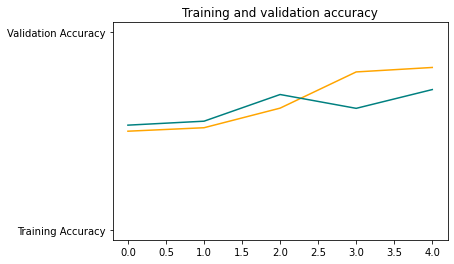

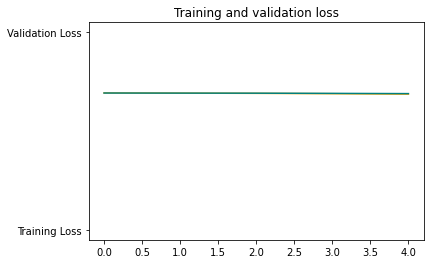

<Figure size 432x288 with 0 Axes>

In [174]:
# standard plotting

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
valloss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'orange', 'Training Accuracy')
plt.plot(epochs, val_acc, 'teal', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'orange', 'Training Loss')
plt.plot(epochs, valloss, 'teal', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

3.  Assess the fitness of the model and any measures taken to address overfitting.

The model did not overfit as the validation loss was lower than the training loss. The model did not stop training until the 5th epoch. The model could have been trained longer to see if it would have stopped training earlier but likely would have been overfitting the data. This model has an accuracy of > 80%. The loss is high but that is due binary classification problem. Please note that results may vary on different runs of the model due to TensorFlow's random initialization of weights and seed setting not.


4.  Discuss the predictive accuracy of the trained network.



In [175]:
#print accuracy and loss
print("Accuracy: ", history.history['accuracy'][-1])
print("Loss: ", history.history['loss'][-1])

Accuracy:  0.8218318819999695
Loss:  0.6868399977684021


Again, accuracy is < 80% and the loss is high but that is due binary classification problem. 

## Part V:  Summary and Recommendations

### E.  Provide the code used to save the trained network within the neural network.

Inline above

### F.  Discuss the functionality of your neural network, including the impact of the network architecture.

This NLP deep learning model was developed for predicting positive or negative sentiment in movie reviews with a high degree of accuracy without overfitting. The model was trained on 80% of the data and tested on 20% of the data. The model was trained for 5 epochs and did not stop training until the 5th epoch. The model did not overfit as the validation loss was lower than the training loss. The model could have been trained longer to see if it would have stopped training earlier but likely would have been overfitting the data. This model has an accuracy of 80%. The loss is high but that is due binary classification problem.

The model used 4 layers, 2 hidden layers and 1 output layer. The first hidden layer had 6 nodes and the output layer had 1 node. The first hidden layer used relu activation and the output layer used sigmoid activation. The model used binary crossentropy as the loss function and adam as the optimizer. 

### G.  Recommend a course of action based on your results.

This model should be used to predict sentiment in movie reviews. It should not be used to predict sentiment in other industries as the model was trained on movie reviews and not other industries. To validate, another set of movie reviews should be used to test the model such as UCIs open source movie review dataset from Amazon.




## Part VI: Reporting

### H.  Create your neural network using an industry-relevant interactive development environment (e.g., a Jupyter Notebook). Include a PDF or HTML document of your executed notebook presentation.

Inline above and PDF attached


### I.  List the web sources used to acquire data or segments of third-party code to support the application.

https://www.tensorflow.org/tutorials/keras/text_classification


### J.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

Sources:

Sucky, R. N. (2021, July 8). A complete step by step tutorial on sentiment analysis in Keras and tensorflow. Medium. Retrieved October 23, 2022, from https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f 


### K.  Demonstrate professional communication in the content and presentation of your submission.

Panapto included as link attachment